# Capstone Sponsor Deliverable
# Empirical Study on the Directors in US-Issued Companies


#### Fatima Nurmakhamadova - Group 7
#### College of Professional Studies, Northeastern University
#### ALY6980.70447: Capstone
#### Dr. Roy Wada
#### December 18, 2022

This file represents the individual contribution of Fatima Nurmakhamadova toward the final project of Group 7. 


It includes Predictive Modeling Part 1 - Regression Analysis (LR). For this, you will need the <Processed_Data_5.csv> file that was generated at the end of the Data processing in the code file <2. Data Processing.ipynb>. Or use already exported file <Processed_Data_5.csv> attached to this submission   

###  Import Libraries and Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

## File: '4. Processed_Data_5.csv' 

## Data Extraction
### Importing the dataset

In [6]:
# Please upload the attached 'Processed_Data_5.csv' file
# into the same folder where this file is in Jupyter Notebook
df = pd.read_csv('Processed_Data_5.csv',  sep=',')

#See and check the dataset
df.head()

,target,ISSUERID,INDIVIDUAL_ID,DepartTime,AGE,Tenure,DirectorshipCount,AVG_IPS,MED_IPS,AVG_Weighted_Connection,...,ISSUER_CNTRY_DOMICILE,CONTROLLED_VIA_STOCK_PYRAMID,HAS_CORPORATE_PARENT,OWNERSHIP_CATEGORY,IVY_indicator,Avg_3rd_connect_17_22,Ttl_controv_17_22,CEO_leav,Chairman_leav,Lead_D_leav
0,0,IID000000002123703,88176,0,67,0,1,7.98,7.98,0.45,...,US,No,No,Widely Held,False,6,3,F,F,F
1,0,IID000000002123703,139570,0,62,0,3,5.85,5.85,0.43,...,US,No,No,Widely Held,UNKNOWN,8,3,F,F,F
2,0,IID000000002123703,22405,0,67,0,5,5.32,5.32,0.44,...,US,No,No,Widely Held,False,6,3,F,F,F
3,0,IID000000002123703,178049,0,67,0,4,8.77,8.77,0.46,...,US,No,No,Widely Held,False,8,3,F,F,F
4,0,IID000000002123703,685844,0,56,1,1,5.72,5.88,0.00,...,US,No,No,Widely Held,UNKNOWN,0,3,F,F,F


In [7]:
#Check the data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   target                                4155 non-null   int64  
 1   ISSUERID                              4155 non-null   object 
 2   INDIVIDUAL_ID                         4155 non-null   int64  
 3   DepartTime                            4155 non-null   int64  
 4   AGE                                   4155 non-null   int64  
 5   Tenure                                4155 non-null   int64  
 6   DirectorshipCount                     4155 non-null   int64  
 7   AVG_IPS                               4155 non-null   float64
 8   MED_IPS                               4155 non-null   float64
 9   AVG_Weighted_Connection               4155 non-null   float64
 10  MED_Weighted_Connection               4155 non-null   float64
 11  DOMINANT_SHAREHOL

### Create functions for Confusion Matrix and ROC Curve generation

In [8]:
#Create a function make_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [9]:
# Create a function to plot roc curve
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

def roc_curve_plot(y_test,y_pred_proba):

  plt.figure(figsize = (8, 6))
# Calculate fpr, tpr, and thresholds for test set
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the training FPR and TPR
  plt.plot(fpr, tpr, label = "ROC")
  plt.text(0.65, 0.3, "AUC="+str(round(auc,2)), ha='center',fontsize=14,weight='bold')
  
# Plot positive sloped 1:1 line for reference
  plt.plot([0,1],[0,1])
  plt.xlim([-0.02, 1.0])
  plt.ylim([0.0, 1.05])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)

## Predictive Models - Part 1: Regression Analysis
## Logistic Regression

## Data Preparation 

In [10]:
#Remove unnecessary columns before modeling
df_modeling = df.drop(columns=['ISSUERID', 'INDIVIDUAL_ID','DepartTime', 
                               'MED_IPS','MED_Weighted_Connection','OWNERSHIP_CATEGORY',
                               'education','Directorship_Level', 'Sector',
                               'Directorship_Level_4','ISSUER_CNTRY_DOMICILE',])

#Check the data type
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   target                                4155 non-null   int64  
 1   AGE                                   4155 non-null   int64  
 2   Tenure                                4155 non-null   int64  
 3   DirectorshipCount                     4155 non-null   int64  
 4   AVG_IPS                               4155 non-null   float64
 5   AVG_Weighted_Connection               4155 non-null   float64
 6   DOMINANT_SHAREHOLDER_PCT              4155 non-null   float64
 7   INSIDERS_OFFICERS_DIRECTORS_HELD_PCT  4155 non-null   float64
 8   PRINCIPAL_SHAREHOLDER_PCT             4155 non-null   float64
 9   CONTROLLING_SHAREHOLDER_PCT           4155 non-null   float64
 10  GENDER                                4155 non-null   object 
 11  COMPANY_FOUNDER  

In [11]:
df_modeling['target'].value_counts()

0    3794
1     361
Name: target, dtype: int64

Text(0, 0.5, 'Number of Directors')

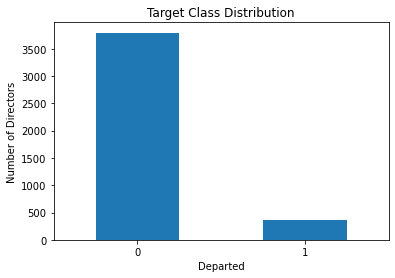

In [12]:
#Target class distribution
import matplotlib.pyplot as plt

figsize = (15, 10)
target_imbalance = df_modeling['target'].value_counts().plot(kind='bar')
    
plt.xticks(rotation=0)
# giving title for the graph
target_imbalance.set_title('Target Class Distribution')
# giving X and Y labels
plt.xlabel("Departed")
plt.ylabel("Number of Directors")

In [13]:
#Split dataset in features and target variable
X = df_modeling.loc[:, df_modeling.columns != 'target'] # independent variables set
y = df_modeling['target']                      # dependent variable

In [14]:
#Encoding Categorical Variables
X = pd.get_dummies(X, drop_first=True)

#Show the result
X.head()

,AGE,Tenure,DirectorshipCount,AVG_IPS,AVG_Weighted_Connection,DOMINANT_SHAREHOLDER_PCT,INSIDERS_OFFICERS_DIRECTORS_HELD_PCT,PRINCIPAL_SHAREHOLDER_PCT,CONTROLLING_SHAREHOLDER_PCT,Avg_3rd_connect_17_22,...,MULTIPLE_CLASSES_OF_VOTING_STOCK_Yes,OutsideRelatedReason_Positive,OutsideRelatedReason2_Positive,CONTROLLED_VIA_STOCK_PYRAMID_Yes,HAS_CORPORATE_PARENT_Yes,IVY_indicator_True,IVY_indicator_UNKNOWN,CEO_leav_T,Chairman_leav_T,Lead_D_leav_T
0,67,0,1,7.98,0.45,0.0,0.1,0.0,0.0,6,...,0,0,0,0,0,0,0,0,0,0
1,62,0,3,5.85,0.43,0.0,0.1,0.0,0.0,8,...,0,0,0,0,0,0,1,0,0,0
2,67,0,5,5.32,0.44,0.0,0.1,0.0,0.0,6,...,0,0,0,0,0,0,0,0,0,0
3,67,0,4,8.77,0.46,0.0,0.1,0.0,0.0,8,...,0,0,0,0,0,0,0,0,0,0
4,56,1,1,5.72,0.00,0.0,0.1,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
#Show the results
y.value_counts()

0    3794
1     361
Name: target, dtype: int64

In [16]:
#Show most highly correlated variables
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(X, .9)

DOMINANT_SHAREHOLDER_PCT  CONTROLLING_SHAREHOLDER_PCT    0.925496
AGE                       AGE                                 NaN
dtype: float64

In [17]:
#Calculate the VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Select highly correlated features
high_corr = X[['CONTROLLING_SHAREHOLDER_PCT', 'DOMINANT_SHAREHOLDER_PCT',
               'AGE']]

# VIF dataframe
vif = pd.DataFrame()
vif["Column"] = high_corr.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(high_corr.values, i) for i in range(high_corr.shape[1])] 
#Show the result
vif.sort_values('VIF', ascending=False)

,Column,VIF
1,DOMINANT_SHAREHOLDER_PCT,11.032643
0,CONTROLLING_SHAREHOLDER_PCT,7.986420
2,AGE,2.338639


In [18]:
#Dropping columns with high multicollinearity 
X = X.drop('DOMINANT_SHAREHOLDER_PCT',axis=1)

#Recheck VIF Score again
#Select highly correlated features
high_corr = X[['CONTROLLING_SHAREHOLDER_PCT', 'AGE']]

# VIF dataframe
vif = pd.DataFrame()
vif["Column"] = high_corr.columns
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(high_corr.values, i) for i in range(high_corr.shape[1])] 
#Show the result
vif.sort_values('VIF', ascending=False)

,Column,VIF
1,AGE,1.134089
0,CONTROLLING_SHAREHOLDER_PCT,1.134089


In [19]:
#Show X dataset
X.head()

,AGE,Tenure,DirectorshipCount,AVG_IPS,AVG_Weighted_Connection,INSIDERS_OFFICERS_DIRECTORS_HELD_PCT,PRINCIPAL_SHAREHOLDER_PCT,CONTROLLING_SHAREHOLDER_PCT,Avg_3rd_connect_17_22,Ttl_controv_17_22,...,MULTIPLE_CLASSES_OF_VOTING_STOCK_Yes,OutsideRelatedReason_Positive,OutsideRelatedReason2_Positive,CONTROLLED_VIA_STOCK_PYRAMID_Yes,HAS_CORPORATE_PARENT_Yes,IVY_indicator_True,IVY_indicator_UNKNOWN,CEO_leav_T,Chairman_leav_T,Lead_D_leav_T
0,67,0,1,7.98,0.45,0.1,0.0,0.0,6,3,...,0,0,0,0,0,0,0,0,0,0
1,62,0,3,5.85,0.43,0.1,0.0,0.0,8,3,...,0,0,0,0,0,0,1,0,0,0
2,67,0,5,5.32,0.44,0.1,0.0,0.0,6,3,...,0,0,0,0,0,0,0,0,0,0
3,67,0,4,8.77,0.46,0.1,0.0,0.0,8,3,...,0,0,0,0,0,0,0,0,0,0
4,56,1,1,5.72,0.00,0.1,0.0,0.0,0,3,...,0,0,0,0,0,0,1,0,0,0


In [20]:
#Split Data into Training and Testing (70/30)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123) #stratify=y

In [21]:
# check splited datasets
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2908, 30)
Training Labels Shape: (2908,)
Testing Features Shape: (1247, 30)
Testing Labels Shape: (1247,)


In [22]:
#Fixing Class Imbalance with Using SMOTE Algorithm (Oversampling)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



Before OverSampling, counts of label '1': 240
Before OverSampling, counts of label '0': 2668 

After OverSampling, the shape of train_X: (5336, 30)
After OverSampling, the shape of train_y: (5336,) 

After OverSampling, counts of label '1': 2668
After OverSampling, counts of label '0': 2668


## Modeling

### Logistic Regression Model with statsmodels package

Here we used the statsmodels library as it allows us to generate a summary table where we can define each feature’s constant effect on the director's departure

In [23]:
#Logistic Regression Summary with sm.Logit()
import statsmodels.api as sm

logit_model =sm.Logit(y_train_res, sm.add_constant(X_train_res)).fit(method='bfgs') # - USUAL MODEL

print(logit_model.summary2())

         Current function value: 0.350412
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                                   Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.494    
Dependent Variable:        y                       AIC:                     3801.5974
Date:                      2022-12-16 18:31        BIC:                     4005.6466
No. Observations:          5336                    Log-Likelihood:          -1869.8  
Df Model:                  30                      LL-Null:                 -3698.6  
Df Residuals:              5305                    LLR p-value:             0.0000   
Converged:                 0.0000                  Scale:                   1.0000   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------

/Users/ms_fatishi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
print(np.exp(logit_model.params))

const                                   2.989614
AGE                                     1.025247
Tenure                                  1.013999
DirectorshipCount                       0.684846
AVG_IPS                                 1.044924
AVG_Weighted_Connection                 0.933734
INSIDERS_OFFICERS_DIRECTORS_HELD_PCT    1.014656
PRINCIPAL_SHAREHOLDER_PCT               0.993701
CONTROLLING_SHAREHOLDER_PCT             1.001769
Avg_3rd_connect_17_22                   1.046666
Ttl_controv_17_22                       1.016289
GENDER_Male                             0.833067
COMPANY_FOUNDER_T                       0.300655
EXEC_OR_NON-EXEC_Non-Executive          2.319858
HistIdentity_CEO_T                      0.087289
HistIdentity_Chairman_T                 0.319467
HistIdentity_LeadDirector_T             0.216484
PayCommitteeMember_Positive             0.002323
AuditCommitteeMember_Positive           0.001052
NominatingCommitteeMember_Positive      0.002559
INDEPENDENT_OF_MANAG

In [25]:
# performing predictions on the test dataset
prediction_sm = pd.DataFrame()
prediction_sm['likelihood'] = logit_model.predict(sm.add_constant(X_test))
prediction_sm['prediction'] = np.nan


for i in range(0, len (prediction_sm['likelihood'])):
    if prediction_sm['likelihood'].iloc[i] > 0.5:
        prediction_sm['prediction'].iloc[i] = 1
    else: 
        prediction_sm['prediction'].iloc[i] = 0


prediction_sm['prediction']

1721    1.0
1860    0.0
909     0.0
267     0.0
1459    1.0
       ... 
2737    0.0
2692    0.0
2325    0.0
1079    0.0
921     0.0
Name: prediction, Length: 1247, dtype: float64

In [26]:
#Calculate performance metrics
from sklearn.metrics import classification_report

# print classification report
print('Logistic Regression (sm) performance metrics: ')
print(classification_report(y_test, prediction_sm['prediction']))

Logistic Regression (sm) performance metrics: 
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1126
           1       0.21      0.62      0.31       121

    accuracy                           0.74      1247
   macro avg       0.58      0.69      0.58      1247
weighted avg       0.88      0.74      0.79      1247



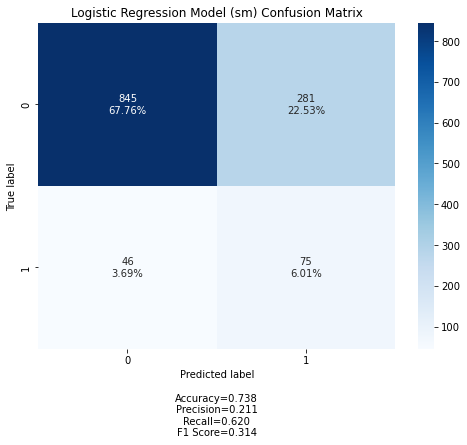

In [27]:
#Generate a confusion_matrix
LR_sm_matrix = confusion_matrix(y_test, prediction_sm['prediction'])


# plot matrix chart
make_confusion_matrix(LR_sm_matrix,
                      title = "Logistic Regression Model (sm) Confusion Matrix",
                      figsize=(8,6))

plt.show()


### Logistic Regression Model with sklearn package

It has almost the same performance as the LR with statsmodels package  

In [28]:
#Building the model with LogisticRegression() - USUAL MODEL
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
model_LR=LR.fit(X_train_res, y_train_res)

# performing predictions on the test dataset
predictions_LR = LR.predict(X_test)
  
#Calculate performance metrics
from sklearn.metrics import classification_report
# print classification report
print('Logistic Regression performance metrics: ')
print(classification_report(y_test, predictions_LR))

Logistic Regression performance metrics: 
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1126
           1       0.21      0.59      0.31       121

    accuracy                           0.74      1247
   macro avg       0.58      0.67      0.57      1247
weighted avg       0.87      0.74      0.79      1247



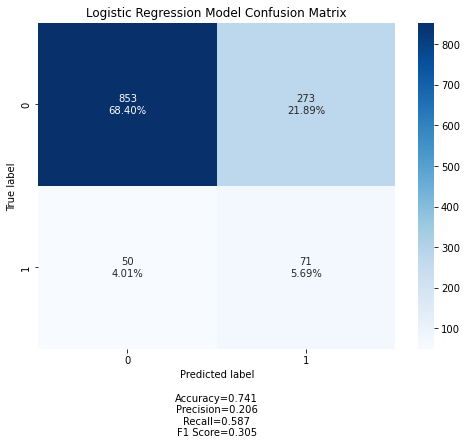

In [29]:
#Generate a confusion_matrix ### sklearn package
LR_matrix = confusion_matrix(y_test, predictions_LR)

# plot matrix chart
make_confusion_matrix(LR_matrix,
                      title = "Logistic Regression Model Confusion Matrix",
                      figsize=(8,6))

plt.show()

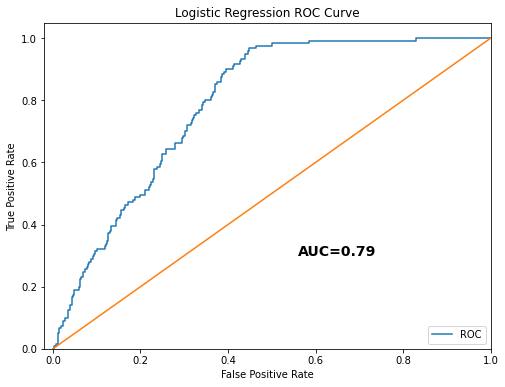

In [30]:
# plot LR ROC curve 
LR_pred_proba = model_LR.predict_proba(X_test)[::,1]
roc_curve_plot(y_test,LR_pred_proba)
plt.title("Logistic Regression ROC Curve")

#plt.savefig('/content/drive/MyDrive/ALY6140/ALY6140 - Group Work/Fig/LR_ROC_Curve.png',bbox_inches='tight')
plt.show()

### LR MODEL WITH AUTO ML PARAMETERS
to check if this will give the same performance results as model created using PyCaret library

In [31]:
#Building the model with LogisticRegression()
from sklearn.linear_model import LogisticRegression

LR_AUTOML = LogisticRegression(max_iter=1000, random_state = 123, tol=0.0001) #rest parameters are default
LR_AUTOML.fit(X_train_res, y_train_res)

# performing predictions on the test dataset
predictions_AUTOML = LR_AUTOML.predict(X_test)
  
#Calculate performance metrics
# print classification report
print('Logistic Regression performance metrics: ')
print(classification_report(y_test, predictions_AUTOML))

Logistic Regression performance metrics: 
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      1126
           1       0.21      0.61      0.32       121

    accuracy                           0.74      1247
   macro avg       0.58      0.68      0.58      1247
weighted avg       0.88      0.74      0.79      1247

